--- Step 1: Displaying Conceptual Plots ---
--> Generating plot: Conceptual Example of Regret


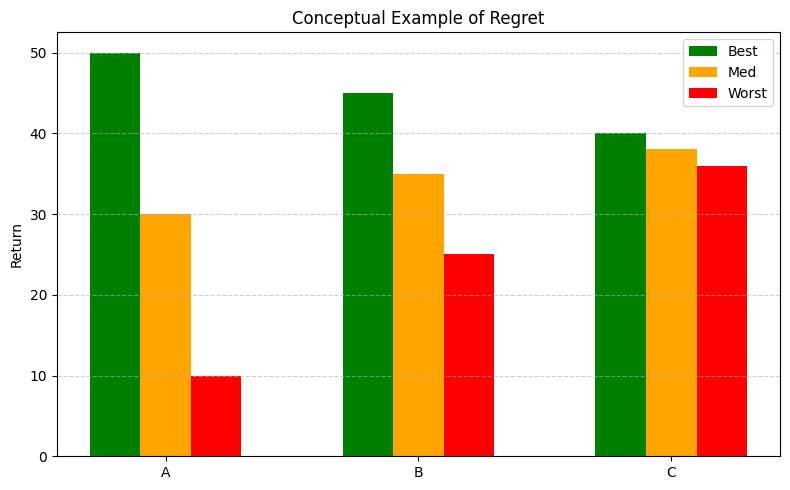

--> Generating plot: Effect of Confidence on Adjusted Returns


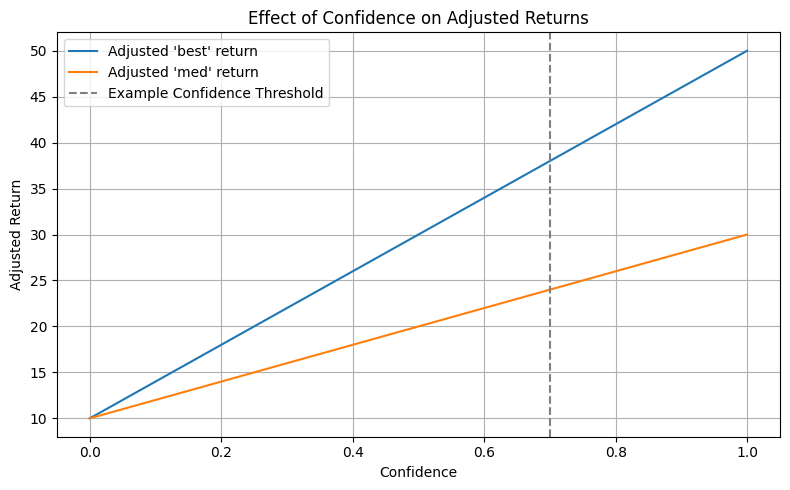


--- Step 2: Running Main Portfolio Optimization ---
Parameters: Budget=$250, Confidence>=0.5, Min Worst Return=$80

--- Calculating Optimal Scenario Returns (V_j_star) ---
  Scenario 'best': V_j_star = 311.50
  Scenario 'med': V_j_star = 219.00
  Scenario 'worst': V_j_star = 120.00

--- Formulating Minimax Regret Problem ---
Solving the main optimization problem...

--- Step 3: Processing and Visualizing Results ---
✅ Optimization Successful!
   - Minimized Max Regret: 7.50
   - Selected Initiatives: ['ProjA', 'ProjB', 'ProjF']
   - Total Cost: $240.00
--> Generating plot: Selected vs. Non-selected Initiatives


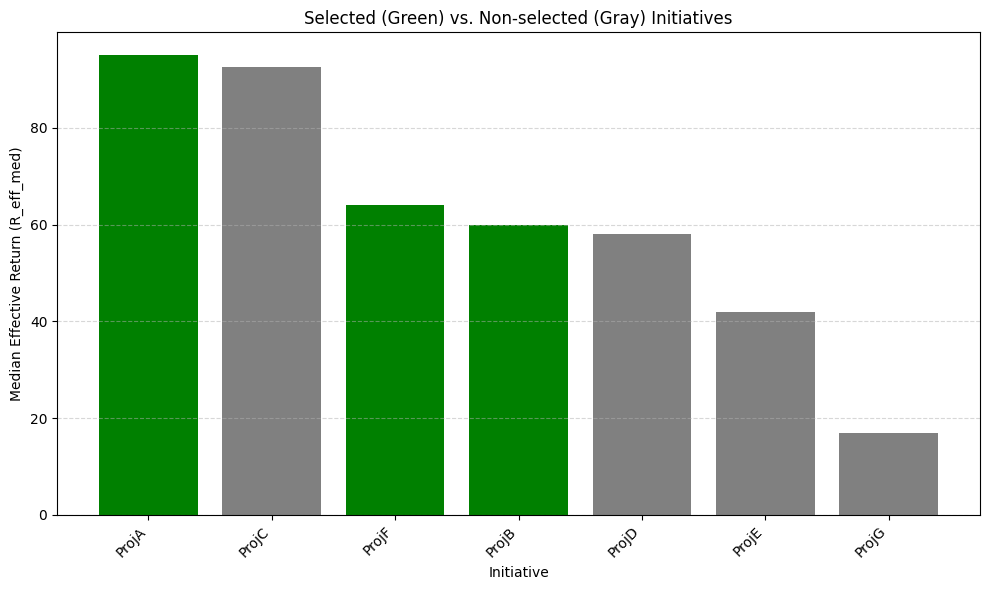

--> Generating plot: Total Portfolio Return by Scenario


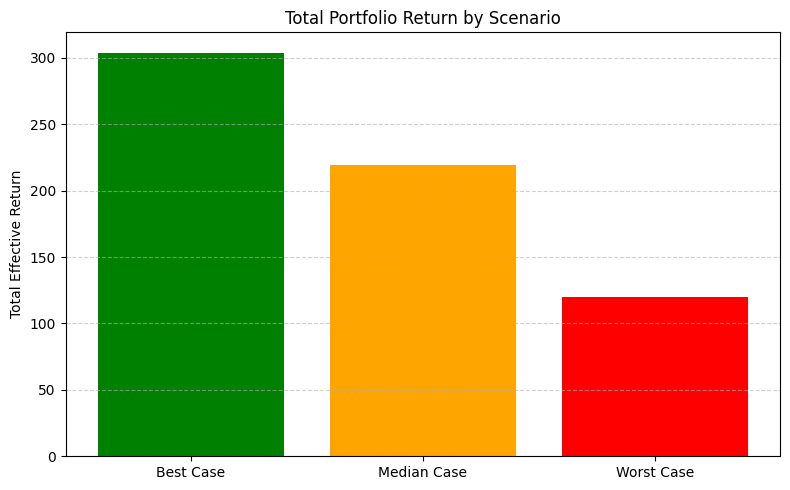


Workflow complete.


In [2]:
# Main Portfolio Analysis and Visualization Workflow
# ----------------------------------------------------
# This script orchestrates the portfolio optimization process by:
# 1. Importing the core optimization engine from 'portfolio_optimizer.py'.
# 2. Defining a suite of visualization functions.
# 3. Running the optimization and generating plots from the results.
# ----------------------------------------------------

# --- Core Imports ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Import the optimization engine from the support script ---
import support as optim

# =============================================================================
# SECTION 1: VISUALIZATION SUITE
# (These functions create plots from the dataframes generated after optimization)
# =============================================================================

def plot_regret_concept():
    """Illustrates the concept of regret across different scenarios."""
    print("--> Generating plot: Conceptual Example of Regret")
    initiatives = {
        "A": {"best": 50, "med": 30, "worst": 10},
        "B": {"best": 45, "med": 35, "worst": 25},
        "C": {"best": 40, "med": 38, "worst": 36}
    }
    scenarios = ["best", "med", "worst"]
    scenario_colors = {"best": "green", "med": "orange", "worst": "red"}

    fig, ax = plt.subplots(figsize=(8, 5))
    width = 0.2
    x = np.arange(len(initiatives))

    for i, scenario in enumerate(scenarios):
        values = [initiatives[k][scenario] for k in initiatives.keys()]
        ax.bar(x + i * width, values, width=width, label=scenario.capitalize(), color=scenario_colors[scenario])

    ax.set_xticks(x + width)
    ax.set_xticklabels(initiatives.keys())
    ax.set_ylabel("Return")
    ax.set_title("Conceptual Example of Regret")
    ax.legend()
    plt.grid(True, axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

def plot_confidence_penalty_effect():
    """Shows how the effective return is penalized by low confidence."""
    print("--> Generating plot: Effect of Confidence on Adjusted Returns")
    c = np.linspace(0, 1, 100)
    gamma = 1 - c
    R_base = {"best": 50, "med": 30, "worst": 10}
    plt.figure(figsize=(8, 5))

    for scenario in ["best", "med"]:
        R_eff = (1 - gamma) * R_base[scenario] + gamma * R_base["worst"]
        plt.plot(c, R_eff, label=f"Adjusted '{scenario}' return")

    plt.axvline(x=0.7, color="gray", linestyle="--", label="Example Confidence Threshold")
    plt.title("Effect of Confidence on Adjusted Returns")
    plt.xlabel("Confidence")
    plt.ylabel("Adjusted Return")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def plot_portfolio_selection(df):
    """Visualizes the selected vs. non-selected initiatives based on optimization."""
    print("--> Generating plot: Selected vs. Non-selected Initiatives")
    df_sorted = df.sort_values("R_eff_med", ascending=False)
    colors = df_sorted["selected"].map({True: "green", False: "gray"})

    plt.figure(figsize=(10, 6))
    plt.bar(df_sorted["id"], df_sorted["R_eff_med"], color=colors)
    plt.xlabel("Initiative")
    plt.ylabel("Median Effective Return (R_eff_med)")
    plt.title("Selected (Green) vs. Non-selected (Gray) Initiatives")
    plt.xticks(rotation=45, ha="right")
    plt.grid(True, axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

def plot_return_bands(df):
    """Displays the total portfolio return across best, median, and worst-case scenarios."""
    print("--> Generating plot: Total Portfolio Return by Scenario")
    selected_df = df[df["selected"]]
    if selected_df.empty:
        print("No initiatives selected, skipping return bands plot.")
        return

    scenarios = ["R_eff_best", "R_eff_med", "R_eff_worst"]
    totals = [selected_df[s].sum() for s in scenarios]
    labels = ["Best Case", "Median Case", "Worst Case"]
    colors = ["green", "orange", "red"]

    plt.figure(figsize=(8, 5))
    plt.bar(labels, totals, color=colors)
    plt.title("Total Portfolio Return by Scenario")
    plt.ylabel("Total Effective Return")
    plt.grid(True, axis="y", linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()


# =============================================================================
# SECTION 2: SCRIPT EXECUTION AND WORKFLOW
# =============================================================================

if __name__ == "__main__":
    # --- 1. Define Initial Data and Parameters ---
    investment_opportunities = [
        {'id': 'ProjA', 'cost': 100, 'R_best': 150, 'R_med': 100, 'R_worst': 50, 'confidence': 0.9},
        {'id': 'ProjB', 'cost': 80, 'R_best': 120, 'R_med': 80, 'R_worst': 30, 'confidence': 0.6},
        {'id': 'ProjC', 'cost': 120, 'R_best': 200, 'R_med': 110, 'R_worst': 40, 'confidence': 0.75},
        {'id': 'ProjD', 'cost': 50, 'R_best': 70, 'R_med': 60, 'R_worst': 20, 'confidence': 0.95},
        {'id': 'ProjE', 'cost': 90, 'R_best': 160, 'R_med': 90, 'R_worst': 10, 'confidence': 0.4},
        {'id': 'ProjF', 'cost': 60, 'R_best': 90, 'R_med': 70, 'R_worst': 40, 'confidence': 0.8},
        {'id': 'ProjG', 'cost': 40, 'R_best': 60, 'R_med': 30, 'R_worst': 10, 'confidence': 0.35},
    ]

    BUDGET = 250
    CONFIDENCE_THRESHOLD = 0.5
    MIN_WORST_RETURN = 80

    # --- 2. Conceptual Plots ---
    print("--- Step 1: Displaying Conceptual Plots ---")
    plot_regret_concept()
    plot_confidence_penalty_effect()

    # --- 3. Main Optimization and Visualization ---
    print("\n--- Step 2: Running Main Portfolio Optimization ---")
    print(f"Parameters: Budget=${BUDGET}, Confidence>={CONFIDENCE_THRESHOLD}, Min Worst Return=${MIN_WORST_RETURN}")

    # Call the main solver function from the imported support script
    main_results = optim.solve_minimax_regret_optimization(
        investment_opportunities,
        BUDGET,
        CONFIDENCE_THRESHOLD,
        MIN_WORST_RETURN
    )

    print("\n--- Step 3: Processing and Visualizing Results ---")
    if main_results['status'] == 'Optimal':
        print(f"✅ Optimization Successful!")
        print(f"   - Minimized Max Regret: {main_results['min_max_regret']:.2f}")
        print(f"   - Selected Initiatives: {main_results['selected_initiatives']}")
        print(f"   - Total Cost: ${main_results['total_cost']:.2f}")

        # --- Prepare DataFrame for Plotting ---
        # Call the helper function from the support script to get effective returns
        processed_initiatives = optim.calculate_effective_returns(investment_opportunities)
        
        # Convert to DataFrame
        initiatives_df = pd.DataFrame(processed_initiatives)
        
        # Unpack the 'effective_returns' dictionary into separate columns
        eff_returns_df = pd.json_normalize(initiatives_df['effective_returns']).rename(columns=lambda x: f"R_eff_{x}")
        initiatives_df = initiatives_df.drop('effective_returns', axis=1).join(eff_returns_df)
        
        # Add a 'selected' column based on optimization results
        initiatives_df["selected"] = initiatives_df["id"].isin(main_results["selected_initiatives"])
        
        # --- Generate Plots Based on Results ---
        plot_portfolio_selection(initiatives_df)
        plot_return_bands(initiatives_df)

    else:
        print(f"❌ Optimization failed with status: {main_results['status']}")

    print("\nWorkflow complete.")